# Data analysis for all data collected during our project
 

#### imports and Data 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfQuickSort = pd.read_csv("Results16/quickSort-PC16.csv")
dfQuickSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfMergeSort = pd.read_csv("Results16/mergeSort-PC16.csv")
dfMergeSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


In [40]:
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[0])

dfCounting["Input case"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[0])

dfQuickSort["Input case"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[0])

dfMergeSort["Input case"] = l

In [41]:
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[1])

dfCounting["Size"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[1])

dfQuickSort["Size"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[1])

dfMergeSort["Size"] = l

In [42]:


#removing values that are nonsense 
dfCounting = dfCounting[dfCounting['PKG (J)'] >= 0]
dfCounting = dfCounting[dfCounting['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
dfCounting = dfCounting[dfCounting['Time (ms)'] >= 0]

dfCounting = dfCounting.replace("  ", np.nan)

#missing values for each column
print("MISSING DATA: \n\n ", dfCounting.isnull().sum(axis=0))

dfCounting


MISSING DATA: 

  Test name          0
PKG (J)            0
CPU (J)            0
GPU (J)        20799
Memory (J)         0
Temperature        0
Time (ms)          0
Input case         0
Size               0
dtype: int64


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,5.558350,4.756775,NaN,0.380188,72,622.672,random1,25000
1,random1-25000-1,5.314636,4.515320,NaN,0.365112,72,627.655,random1,25000
2,random1-25000-1,5.447754,4.662659,NaN,0.370605,72,602.698,random1,25000
3,random1-25000-1,5.188416,4.428955,NaN,0.356323,72,596.155,random1,25000
4,random1-25000-1,5.204102,4.443542,NaN,0.355286,72,598.893,random1,25000
...,...,...,...,...,...,...,...,...,...
20794,worst-1000000-1,10.212769,8.609131,NaN,0.739380,60,1346.990,worst,1000000
20795,worst-1000000-1,10.300110,8.668518,NaN,0.757263,60,1342.570,worst,1000000
20796,worst-1000000-1,10.474915,8.800232,NaN,0.767151,61,1382.330,worst,1000000
20797,worst-1000000-1,10.169312,8.535522,NaN,0.756592,60,1326.740,worst,1000000


<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='Time (ms)'>

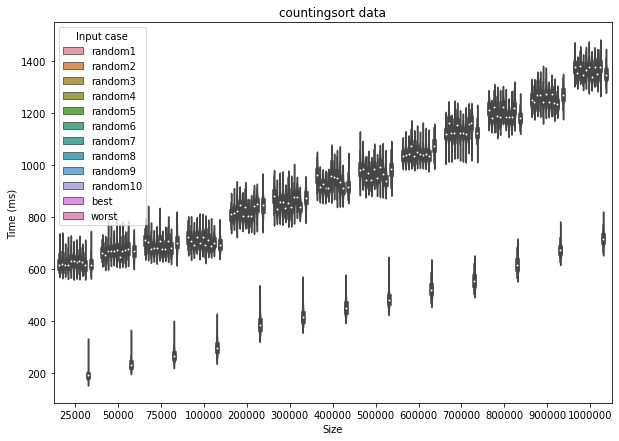

In [43]:
sizes = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]

plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting, y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Quicksort data'}, xlabel='Size', ylabel='Time (ms)'>

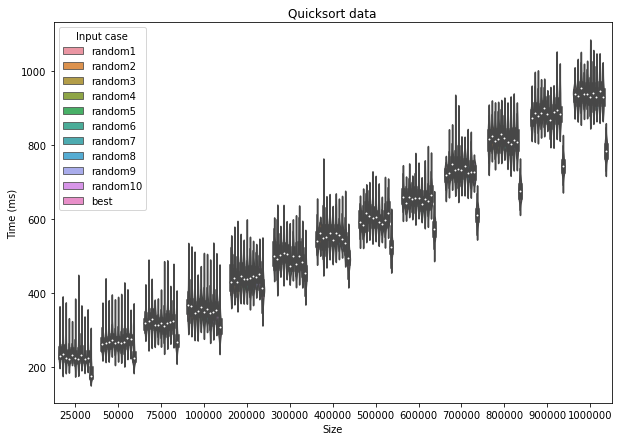

In [47]:
sizes = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]

plt.figure(figsize=(10,7))
plt.title("Quicksort data")
sns.violinplot(data = dfQuickSort[dfQuickSort["Input case"]!="worst"], y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

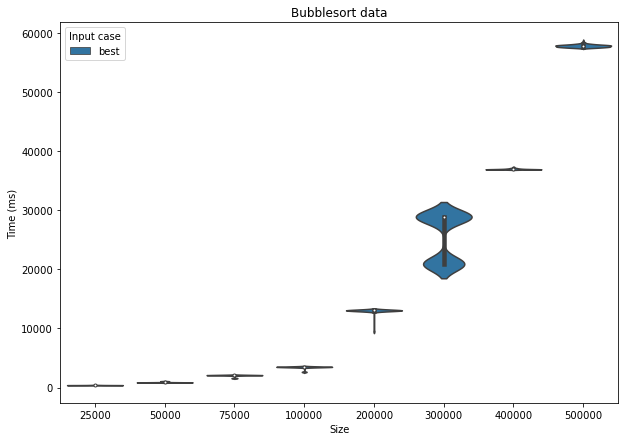

In [50]:
sizes = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]

plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort[dfBubbleSort["Input case"]=="best"], y = "Time (ms)", x = "Size", hue ="Input case")